**Data Augmentation To Address Overfitting In Flower Classification CNN**

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

**Load flowers dataset**

In [2]:
url= 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'
data_dir= tf.keras.utils.get_file('flower_photos', origin=url, cache_dir='.', untar= True)

228818944/228813984 [==============================] - 2s 0us/step


In [3]:
data_dir

'./datasets/flower_photos'

In [4]:
import pathlib
data_dir= pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [5]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/dandelion/2229906591_e953785d13.jpg'),
 PosixPath('datasets/flower_photos/dandelion/4953240903_a121fba81f_m.jpg'),
 PosixPath('datasets/flower_photos/dandelion/8719032054_9a3ce4f0ff.jpg'),
 PosixPath('datasets/flower_photos/dandelion/155646858_9a8b5e8fc8.jpg'),
 PosixPath('datasets/flower_photos/dandelion/23659122395_3467d88c02_n.jpg')]

In [6]:
list(data_dir.glob('roses/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/roses/4325834819_ab56661dcc_m.jpg'),
 PosixPath('datasets/flower_photos/roses/229488796_21ac6ee16d_n.jpg'),
 PosixPath('datasets/flower_photos/roses/6732261031_861a1026fa_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2535466143_5823e48b63.jpg'),
 PosixPath('datasets/flower_photos/roses/16424992340_c1d9eb72b4.jpg')]

In [7]:
total_img= len(list(data_dir.glob('*/*.jpg')))
total_img

3670

In [8]:
roses= list(data_dir.glob('roses/*.jpg'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/4325834819_ab56661dcc_m.jpg'),
 PosixPath('datasets/flower_photos/roses/229488796_21ac6ee16d_n.jpg'),
 PosixPath('datasets/flower_photos/roses/6732261031_861a1026fa_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2535466143_5823e48b63.jpg'),
 PosixPath('datasets/flower_photos/roses/16424992340_c1d9eb72b4.jpg')]

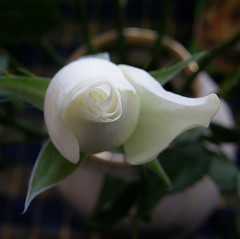

In [9]:
import PIL
PIL.Image.open(roses[0])

**Read flower images from disk into numpy array using opencv**

In [10]:
import cv2
img = cv2.imread(str(roses[0]))
img

array([[[ 0, 15,  4],
        [ 2, 16,  5],
        [ 4, 15,  5],
        ...,
        [15, 38, 60],
        [12, 36, 58],
        [10, 34, 56]],

       [[ 0, 15,  4],
        [ 2, 16,  5],
        [ 4, 15,  5],
        ...,
        [14, 35, 57],
        [10, 33, 55],
        [ 8, 31, 53]],

       [[ 1, 15,  4],
        [ 1, 15,  4],
        [ 3, 14,  4],
        ...,
        [13, 31, 54],
        [10, 28, 51],
        [ 8, 26, 49]],

       ...,

       [[19, 27, 34],
        [21, 28, 37],
        [21, 30, 40],
        ...,
        [ 2,  9,  4],
        [ 2, 12,  6],
        [ 7, 14,  9]],

       [[20, 26, 33],
        [20, 27, 36],
        [20, 29, 39],
        ...,
        [ 2,  9,  6],
        [ 1, 10,  7],
        [ 6, 13, 10]],

       [[20, 25, 34],
        [22, 27, 36],
        [22, 28, 39],
        ...,
        [ 2,  9,  6],
        [ 1, 10,  7],
        [ 6, 13, 10]]], dtype=uint8)

In [11]:
img.shape

(239, 240, 3)

In [12]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [13]:
flowers_dict= {
    'roses': list(data_dir.glob('roses/*.jpg')),
    'daisy': list(data_dir.glob('daisy/*.jpg')),
    'sunflowers': list(data_dir.glob('sunflowers/*.jpg')),
    'dandelion': list(data_dir.glob('dandelion/*.jpg')),
    'tulips': list(data_dir.glob('tulips/*.jpg'))
}

In [14]:
# For model creation.
flowers_dict_labels= {
    'roses': 0,
    'daisy': 1,
    'sunflowers': 2,
    'dandelion': 3,
    'tulips': 4
}

In [15]:
X,y= [],[]

for flower_name, images in flowers_dict.items():
    for i in images:
        img= cv2.imread(str(i))
        resized_img= cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_dict_labels[flower_name])

**Preprocessing: scale images**

In [16]:
import numpy as np
X= np.array(X)
X= X/255
X[0]

array([[[0.        , 0.05882353, 0.01568627],
        [0.01176471, 0.05882353, 0.01960784],
        [0.01960784, 0.05882353, 0.02352941],
        ...,
        [0.0627451 , 0.15294118, 0.23921569],
        [0.05098039, 0.14117647, 0.22745098],
        [0.03921569, 0.13333333, 0.21960784]],

       [[0.        , 0.05882353, 0.01568627],
        [0.00784314, 0.05882353, 0.01568627],
        [0.01176471, 0.05490196, 0.01568627],
        ...,
        [0.0627451 , 0.1372549 , 0.22745098],
        [0.04705882, 0.1254902 , 0.21176471],
        [0.03137255, 0.11372549, 0.2       ]],

       [[0.00392157, 0.05490196, 0.01960784],
        [0.00784314, 0.05490196, 0.01960784],
        [0.01568627, 0.05098039, 0.01960784],
        ...,
        [0.05882353, 0.1254902 , 0.21176471],
        [0.04705882, 0.10980392, 0.2       ],
        [0.04313725, 0.09803922, 0.18823529]],

       ...,

       [[0.0745098 , 0.10588235, 0.13333333],
        [0.08627451, 0.11764706, 0.15294118],
        [0.08627451, 0

In [17]:
y= np.array(y)

**Train test split**

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.30, random_state=0)

In [19]:
len(X_train)

2569

In [20]:
len(X_test)

1101

**Build convolutional neural network and train it**

In [21]:
classifier= models.Sequential([
    
    #cnn
    layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(180,180,3)), 
    layers.MaxPooling2D(),
    layers.Conv2D(40, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(),
    #dense
    layers.Flatten(),
    layers.Dense(20, activation='relu'),
    layers.Dense(5, activation='softmax')
    
])

In [22]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 178, 178, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 87, 87, 40)        11560     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 43, 43, 40)        0         
_________________________________________________________________
flatten (Flatten)            (None, 73960)             0         
_________________________________________________________________
dense (Dense)                (None, 20)                1479220   
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 1

In [23]:
classifier.compile(loss= 'sparse_categorical_crossentropy',
             metrics= ['accuracy'],
             optimizer= 'adam'
             )

In [25]:
classifier.fit(X_train, y_train, validation_split=0.35, batch_size = 10, epochs = 10)

Epoch 1/10
167/167 [==============================] - 2s 13ms/step - loss: 0.0282 - accuracy: 0.9934 - val_loss: 2.5601 - val_accuracy: 0.5944
Epoch 2/10
167/167 [==============================] - 2s 11ms/step - loss: 0.0094 - accuracy: 0.9994 - val_loss: 3.0588 - val_accuracy: 0.5733
Epoch 3/10
167/167 [==============================] - 2s 11ms/step - loss: 0.0100 - accuracy: 0.9988 - val_loss: 3.2513 - val_accuracy: 0.5611
Epoch 4/10
167/167 [==============================] - 2s 11ms/step - loss: 0.0669 - accuracy: 0.9814 - val_loss: 3.0263 - val_accuracy: 0.5622
Epoch 5/10
167/167 [==============================] - 2s 11ms/step - loss: 0.0235 - accuracy: 0.9958 - val_loss: 3.2969 - val_accuracy: 0.5711
Epoch 6/10
167/167 [==============================] - 2s 10ms/step - loss: 0.0747 - accuracy: 0.9784 - val_loss: 2.8929 - val_accuracy: 0.5233
Epoch 7/10
167/167 [==============================] - 2s 11ms/step - loss: 0.0586 - accuracy: 0.9832 - val_loss: 3.0304 - val_accuracy: 0.5422

In [26]:
predictions= classifier.predict(X_test)
predictions[0]

array([1.3704903e-16, 9.9999499e-01, 2.3539255e-06, 1.1620771e-06,
       1.5316760e-06], dtype=float32)

In [27]:
y_pred= [ np.argmax(i) for i in predictions]
y_pred[0]

1

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.37      0.53      0.43       143
           1       0.41      0.50      0.45       154
           2       0.61      0.64      0.62       201
           3       0.74      0.57      0.65       308
           4       0.63      0.55      0.59       295

    accuracy                           0.56      1101
   macro avg       0.55      0.56      0.55      1101
weighted avg       0.59      0.56      0.57      1101



**The train accuracy is very high (99%), the test accuracy is significantly low (56%) indicating overfitting.**

**Improve Test Accuracy Using Data Augmentation**

In [32]:
data_augmentation= keras.Sequential([
                                     layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(180, 
                                                              180,
                                                              3)),
                                     layers.experimental.preprocessing.RandomRotation(0.3),
                                     layers.experimental.preprocessing.RandomZoom(0.2)
                                     
])

**Original Image**

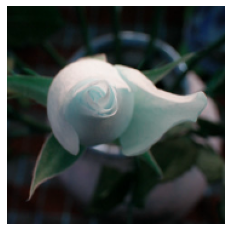

In [41]:
import matplotlib.pyplot as plt

plt.axis('off')
plt.imshow(X[0])

**Newly generated training sample using data augmentation**

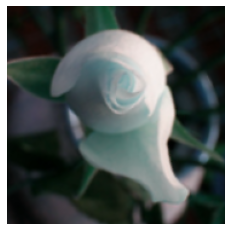

In [42]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0])

**Train the model using data augmentation and a drop out layer**

In [34]:
classifier_aug= models.Sequential([
    
    #cnn
    data_augmentation,
    layers.Conv2D(32, kernel_size=(3,3), activation='relu'), 
    layers.MaxPooling2D(),
    layers.Conv2D(40, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    #dense
    layers.Flatten(),
    layers.Dense(20, activation='relu'),
    layers.Dense(5, activation='softmax')
    
])

In [35]:
classifier_aug.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_2 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 178, 178, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 87, 87, 40)        11560     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 43, 43, 40)        0         
_________________________________________________________________
dropout (Dropout)            (None, 43, 43, 40)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 73960)            

In [36]:
classifier_aug.compile(loss= 'sparse_categorical_crossentropy',
             metrics= ['accuracy'],
             optimizer= 'adam'
             )

In [37]:
classifier_aug.fit(X_train, y_train, validation_split=0.35, batch_size = 10, epochs = 10)

Epoch 1/10
167/167 [==============================] - 3s 15ms/step - loss: 1.6471 - accuracy: 0.2926 - val_loss: 1.3818 - val_accuracy: 0.3967
Epoch 2/10
167/167 [==============================] - 2s 13ms/step - loss: 1.3622 - accuracy: 0.4098 - val_loss: 1.4208 - val_accuracy: 0.4800
Epoch 3/10
167/167 [==============================] - 2s 13ms/step - loss: 1.2132 - accuracy: 0.5258 - val_loss: 1.1664 - val_accuracy: 0.5700
Epoch 4/10
167/167 [==============================] - 2s 13ms/step - loss: 1.1353 - accuracy: 0.5206 - val_loss: 1.0556 - val_accuracy: 0.5611
Epoch 5/10
167/167 [==============================] - 2s 13ms/step - loss: 1.0539 - accuracy: 0.5628 - val_loss: 1.1069 - val_accuracy: 0.5689
Epoch 6/10
167/167 [==============================] - 2s 13ms/step - loss: 1.0199 - accuracy: 0.6058 - val_loss: 1.0558 - val_accuracy: 0.5967
Epoch 7/10
167/167 [==============================] - 2s 13ms/step - loss: 1.0435 - accuracy: 0.5990 - val_loss: 0.9863 - val_accuracy: 0.6133

In [39]:
pred= classifier_aug.predict(X_test)
ypred= [ np.argmax(i) for i in pred]
ypred[0]
print(classification_report(ypred,y_test))

              precision    recall  f1-score   support

           0       0.66      0.47      0.55       292
           1       0.70      0.62      0.65       213
           2       0.73      0.69      0.71       222
           3       0.77      0.65      0.71       284
           4       0.23      0.67      0.35        90

    accuracy                           0.60      1101
   macro avg       0.62      0.62      0.59      1101
weighted avg       0.67      0.60      0.62      1101



The train accuracy is (64%), the test accuracy is (60%).

**By using data augmentation and drop out layer the accuracy of test set predictions is increased to 60%**